# トポロジカルソート
## トポロジカルソートできる条件

グラフが**有向非巡回グラフ（directed acyclic graph, DAG）**であること!

### DAGが満たすべき具体的な条件

頂点uから頂点vに到達できることを、R(u,v)と書くとします。  

すべての頂点u,vについて R(u,v)かつ R(v,u)ならば u=v が成り立つ、かつその時に限り、その有向グラフをトポロジカルソートすることが出来ます。(つまり、ある頂点から出発して、その頂点に戻ってくるような路がない)

### トポロジカルソートの有用性
もしこの有向グラフの頂点がタスクを表し、グラフの有向辺がタスク同士の依存関係を表していた場合、  
トポロジカルソート後の順番に対応するタスクを処理すれば、依存関係を守ったままタスクを全て処理することが出来ます。



※ トポロジカルソートの答えは複数あるので注意

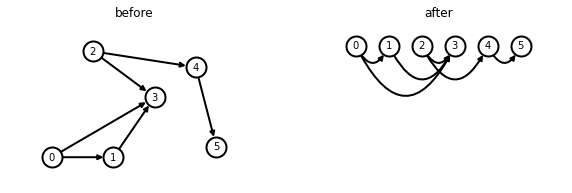

In [123]:
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionStyle
import networkx as nx

# Graphオブジェクトの作成
DG = nx.DiGraph()
DG.add_edge(0, 1)
DG.add_edge(0, 3)
DG.add_edge(1, 3)
DG.add_edge(2, 3)
DG.add_edge(2, 4)
DG.add_edge(4, 5)

options = {
    "font_size": 10,
    "node_size": 400,
    "node_color": "white",
    "edgecolors": "black",
    "linewidths": 2,
    "width": 2,
}

# ソート前は適当に配置
pos_before = {0: (-3, 0), 1: (0, 0), 2: (-1, 0.3), 3: (2, 0.17), 4: (4, 0.255), 5: (5, 0.03)}
# トポロジカルソート後の配置
pos_after = {0: (0, 0), 1: (8, 0), 2: (16, 0), 3: (24, 0), 4: (32, 0), 5: (40, 0)}


# ax = plt.gca()
# ax.margins(0.20)
# plt.axis("off")
# plt.show()

# トポロジカルソート前後を二つ並べる
fig = plt.figure(figsize=(10, 3))
# 左
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title('before')
ax1.set_axis_off()
ax1.margins(0.2)
nx.draw_networkx(DG, pos=pos_before, ax=ax1, **options)
# 右
ax2 = fig.add_subplot(1, 2, 2)
ax2.set_title('after')
ax2.set_axis_off()
ax2.margins(0.2)
nx.draw_networkx(DG, pos_after, ax=ax2, **options, connectionstyle="arc3, rad=1")

上のbefore, afterをみると、トポロジカルソートが依存関係のタスクを明示化することがわかる。  

## トポロジカルソートの実装
各ノードの入り次数を `indegrees` で管理し、入り次数が0の場合、依存関係の上にあることを利用して、入り次数を消去して、0になったものから `result` に追加していく

In [126]:
from collections import deque
"""
以下の操作を繰り返し、全ての頂点を取り除いた後に得られる配列がトポロジカルソートされている！
1. 入次数0の頂点vを発見する。
2. 頂点vを配列の末尾に追加する。
3. 有向グラフから頂点vと、その頂点から出ている辺をすべて削除する
"""

def topological_sort(graph, indegrees):
    result = []

    dq = deque()
    # 入り次数が 0 の頂点を記録する
    for i, val in enumerate(indegrees):
        if val == 0:
            dq.append(i)

    while dq:
        v = dq.pop()

        # その頂点と隣接している頂点の入り次数を減らし、0になればdqに追加する
        for u in graph[v]:
            indegrees[u] -= 1
            if indegrees[u] == 0:
                dq.append(u)

        # 頂点 v を配列の末尾に追加する
        result.append(v)

    return result


In [127]:
vertices, edges = 6, 6
edges = [(0,1), (0,3), (1,3), (2,3), (2,4), (4,5)]
graph = [[] for _ in range(vertices)]
# 各頂点の入り次数を格納する配列
indegrees = [0] * vertices

for edge in edges:
    # s から t への有向edgeが与えられる
    s, t = edge
    graph[s].append(t)
    indegrees[t] += 1
    
ans = topological_sort(graph, indegrees)
print(*ans)

2 4 5 0 1 3
